<a href="https://colab.research.google.com/github/ShashankMk031/MNIST-classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml #Loading the MNIST data
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'] , mnist['target']
print("Data shape : ", X.shape) #There are 70,000 images and each image has 784 features(28 X 28 pixels)
print("Target Shape: ", y.shape)

Data shape :  (70000, 784)
Target Shape:  (70000,)


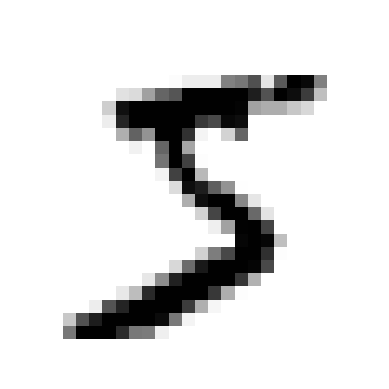

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

example_digit = X.iloc[0]
ex_digit_img_ = example_digit.values.reshape(28,28)
plt.imshow(ex_digit_img_, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [10]:
#The output of y is a string so we are casting the string into integers
y = y.astype(np.uint8)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #Splitting the data into test and train set , since it is already predefined in the dataset.

## Training a Binary Classifier

In [13]:
# A binary classifier of 5 out of 0-9 digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
# Creating a SGDClassifier and training it
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
#Example data test
sgd_clf.predict([example_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance analysis using Confusion matrix

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [17]:
# THe confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
#Precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision score: " ,precision_score(y_train_5, y_train_pred))
print("Recall score: " ,recall_score(y_train_5, y_train_pred))

Precision score:  0.8370879772350012
Recall score:  0.6511713705958311


In [19]:
from sklearn.metrics import f1_score
print("F1 Score: " , f1_score(y_train_5, y_train_pred))

F1 Score:  0.7325171197343847


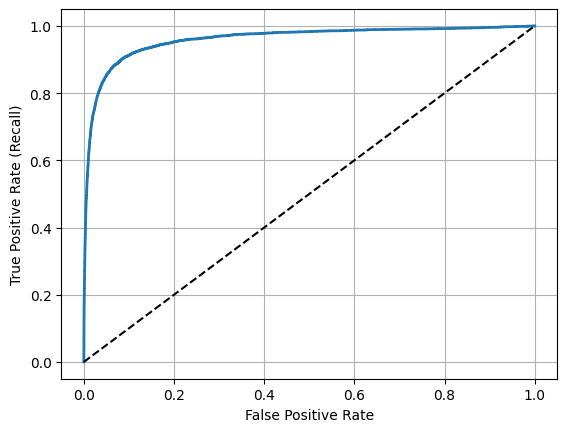

In [21]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

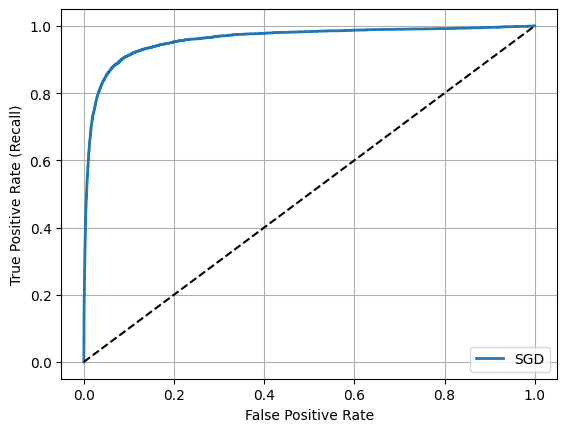

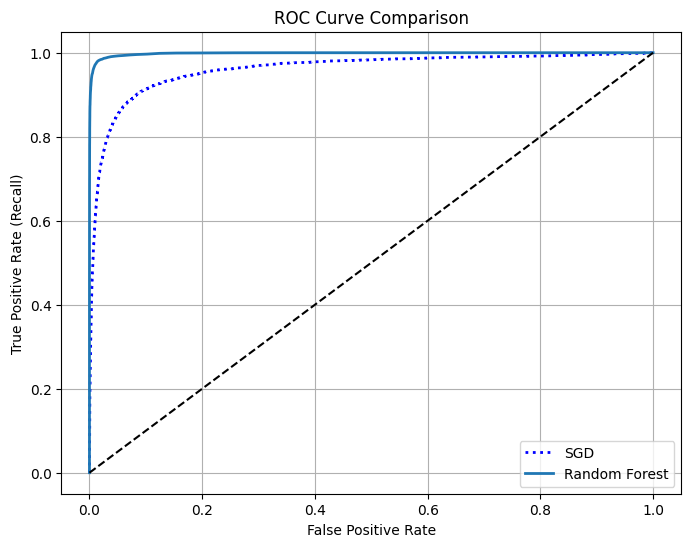

AUC Score (SGD): 0.9604938554008616
AUC Score (Random Forest): 0.9983436731328145


In [22]:
# prompt: ROC curve comparision with Random forest classifier for this binary classifier

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

plot_roc_curve(fpr, tpr, "SGD")
plt.legend(loc="lower right")
plt.show()

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]  # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison")
plt.show()

print("AUC Score (SGD):", roc_auc_score(y_train_5, y_scores))
print("AUC Score (Random Forest):", roc_auc_score(y_train_5, y_scores_forest))


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [27]:
knn_clf = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = [
    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}
]

In [28]:
# Perform GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=  48.9s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  43.5s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  40.5s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  41.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  40.6s
[CV] END ....................n_neighbors=3, weights=distance; total time=  39.9s
[CV] END ....................n_neighbors=3, weights=distance; total time=  43.3s
[CV] END ....................n_neighbors=3, weights=distance; total time=  38.7s
[CV] END ....................n_neighbors=3, weights=distance; total time=  38.8s
[CV] END ....................n_neighbors=3, weights=distance; total time=  39.5s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  40.4s
[CV] END .....................n_neighbors=4, weig

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

In [29]:
print("Best parameters found: ", grid_search.best_params_) # We fit the model for 5 folds each of 6 candidates , totalling 30 fits

print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score:  0.9716166666666666


In [30]:
# Evaluate the best estimator on the test set
best_knn_clf = grid_search.best_estimator_
y_test_pred = best_knn_clf.predict(X_test)


In [32]:
# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy: ", test_accuracy)

# You can also print the classification report for more detailed metrics on the test set
from sklearn.metrics import classification_report
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Test set accuracy:  0.9714

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

